In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from scipy.stats.stats import pearsonr
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

#Step 5: Classification with SVM, Logistic Regression and Random Forest. 

###Get, check and clean the data

In order to predict if a dating pair could be matched, we intend to use unique pairs in dataset "merged_df.csv" since we don't care about who is iid or piid in our match problem. Thus, we only have 3639 data points and features ending with "_x" conerning the man in a pair and "_y" the woman. 

In [2]:
df=pd.read_csv("classification_df.csv")
dftrain=pd.read_csv("classification_dftrain.csv")
dftest=pd.read_csv("classification_dftest.csv")
print "df: ", df.shape
print "dftrain: ", dftrain.shape
print "dftest: ", dftest.shape

df:  (3639, 189)
dftrain:  (2547, 189)
dftest:  (1092, 189)


In [3]:
df.head()

,iid,gender_x,piid,match_x,age_x,imprace_x,imprelig_x,date_x,go_out_x,sports_x,tvsports_x,exercise_x,dining_x,museums_x,art_x,hiking_x,gaming_x,clubbing_x,reading_x,tv_x,theater_x,movies_x,concerts_x,music_x,shopping_x,yoga_x,attr1_1_x,sinc1_1_x,intel1_1_x,fun1_1_x,amb1_1_x,shar1_1_x,attr2_1_x,sinc2_1_x,intel2_1_x,fun2_1_x,amb2_1_x,shar2_1_x,attr3_1_x,sinc3_1_x,fun3_1_x,intel3_1_x,amb3_1_x,attr_x,sinc_x,intel_x,fun_x,amb_x,shar_x,like_x,...,f3social_sci_y,f4medical_sci_y,f5engineering_y,f6english_y,f7hist_y,f8business_y,f9edu_y,f10bio_sci_y,f11social_work_y,f12undergrad_y,f13poli_sci_y,f14film_y,f15arts_y,f16languages_y,f17architecture_y,f18other_y,r1black_y,r2european_y,r3latino_y,r4asian_y,r6other_y,c1lawyer_y,c2academic_y,c3psycho_y,c4doctor_y,c5engineer_y,c6entertainment_y,c7banking_y,c8real_estate_y,c9inter_affairs_y,c10undeci_y,c11social_work_y,c12speech_y,c13politics_y,c14sports_y,c15other_y,c16journalism_y,c17architecture_y,goal_s_y,sum_in_z,age_d_z,imprace_d_z,imprelig_d_z,date_d_z,go_out_d_z,goal_d_z,career_d_z,field_d_z,race_d_z,from_d_z
0,11,1,1,0,0.16801,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.69091,0.65867,-1.305903,-1.276804,0.04145,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.37245,-1.479011,-0.086418,0.482822,0.428537,0.862506,0.700388,0.294916,0.490433,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.071589,1.672020,1.748867,-0.351741,-1.369453,2.679321,1,0,0,0,0
1,11,1,2,0,0.16801,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.69091,0.65867,-1.305903,-1.276804,0.04145,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.37245,-1.479011,0.953656,-0.102563,-0.872202,1.389570,0.122142,-0.702463,0.490433,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.254698,0.840611,1.748867,-0.707999,0.016455,2.679321,1,0,0,1,0
2,11,1,3,0,0.16801,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.69091,0.65867,-1.305903,-1.276804,0.04145,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.37245,-1.479011,0.433619,0.482822,-0.872202,-0.718686,0.700388,-0.702463,-0.621637,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-3.146662,0.563475,-0.376827,-0.351741,1.402363,2.679321,1,0,0,1,0
3,11,1,4,0,0.16801,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.69091,0.65867,-1.305903,-1.276804,0.04145,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.37245,-1.479011,-0.086418,-0.102563,0.428537,0.335442,0.122142,-0.203774,-0.065602,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.794991,1.117747,2.103149,0.717034,0.016455,2.679321,1,0,0,1,0
4,11,1,5,0,0.16801,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.69091,0.65867,-1.305903,-1.276804,0.04145,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.37245,-1.479011,-0.086418,0.482822,0.428537,0.862506,0.122142,0.294916,-0.065602,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.167924,1.672020,-0.376827,0.717034,0.709409,2.6793

In [4]:
dftrain.head()

,iid,gender_x,piid,match_x,age_x,imprace_x,imprelig_x,date_x,go_out_x,sports_x,tvsports_x,exercise_x,dining_x,museums_x,art_x,hiking_x,gaming_x,clubbing_x,reading_x,tv_x,theater_x,movies_x,concerts_x,music_x,shopping_x,yoga_x,attr1_1_x,sinc1_1_x,intel1_1_x,fun1_1_x,amb1_1_x,shar1_1_x,attr2_1_x,sinc2_1_x,intel2_1_x,fun2_1_x,amb2_1_x,shar2_1_x,attr3_1_x,sinc3_1_x,fun3_1_x,intel3_1_x,amb3_1_x,attr_x,sinc_x,intel_x,fun_x,amb_x,shar_x,like_x,...,f3social_sci_y,f4medical_sci_y,f5engineering_y,f6english_y,f7hist_y,f8business_y,f9edu_y,f10bio_sci_y,f11social_work_y,f12undergrad_y,f13poli_sci_y,f14film_y,f15arts_y,f16languages_y,f17architecture_y,f18other_y,r1black_y,r2european_y,r3latino_y,r4asian_y,r6other_y,c1lawyer_y,c2academic_y,c3psycho_y,c4doctor_y,c5engineer_y,c6entertainment_y,c7banking_y,c8real_estate_y,c9inter_affairs_y,c10undeci_y,c11social_work_y,c12speech_y,c13politics_y,c14sports_y,c15other_y,c16journalism_y,c17architecture_y,goal_s_y,sum_in_z,age_d_z,imprace_d_z,imprelig_d_z,date_d_z,go_out_d_z,goal_d_z,career_d_z,field_d_z,race_d_z,from_d_z
0,11,1,1,0,0.16801,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.69091,0.65867,-1.305903,-1.276804,0.04145,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.37245,-1.479011,-0.086418,0.482822,0.428537,0.862506,0.700388,0.294916,0.490433,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.071589,1.672020,1.748867,-0.351741,-1.369453,2.679321,1,0,0,0,0
1,11,1,2,0,0.16801,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.69091,0.65867,-1.305903,-1.276804,0.04145,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.37245,-1.479011,0.953656,-0.102563,-0.872202,1.389570,0.122142,-0.702463,0.490433,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.254698,0.840611,1.748867,-0.707999,0.016455,2.679321,1,0,0,1,0
2,11,1,5,0,0.16801,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.69091,0.65867,-1.305903,-1.276804,0.04145,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.37245,-1.479011,-0.086418,0.482822,0.428537,0.862506,0.122142,0.294916,-0.065602,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.167924,1.672020,-0.376827,0.717034,0.709409,2.679321,1,0,0,1,0
3,11,1,6,0,0.16801,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.69091,0.65867,-1.305903,-1.276804,0.04145,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.37245,-1.479011,0.433619,1.068207,0.428537,1.389570,0.700388,-0.702463,0.490433,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.472133,1.117747,2.103149,0.717034,1.402363,2.679321,1,0,0,0,0
4,11,1,8,0,0.16801,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.69091,0.65867,-1.305903,-1.276804,0.04145,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.37245,-1.479011,0.953656,-0.102563,-0.872202,-0.191622,-0.456103,-0.203774,0.490433,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-5.860623,0.563475,2.103149,0.717034,0.016455,2.679321,1,

In [5]:
dftest.head()

,iid,gender_x,piid,match_x,age_x,imprace_x,imprelig_x,date_x,go_out_x,sports_x,tvsports_x,exercise_x,dining_x,museums_x,art_x,hiking_x,gaming_x,clubbing_x,reading_x,tv_x,theater_x,movies_x,concerts_x,music_x,shopping_x,yoga_x,attr1_1_x,sinc1_1_x,intel1_1_x,fun1_1_x,amb1_1_x,shar1_1_x,attr2_1_x,sinc2_1_x,intel2_1_x,fun2_1_x,amb2_1_x,shar2_1_x,attr3_1_x,sinc3_1_x,fun3_1_x,intel3_1_x,amb3_1_x,attr_x,sinc_x,intel_x,fun_x,amb_x,shar_x,like_x,...,f3social_sci_y,f4medical_sci_y,f5engineering_y,f6english_y,f7hist_y,f8business_y,f9edu_y,f10bio_sci_y,f11social_work_y,f12undergrad_y,f13poli_sci_y,f14film_y,f15arts_y,f16languages_y,f17architecture_y,f18other_y,r1black_y,r2european_y,r3latino_y,r4asian_y,r6other_y,c1lawyer_y,c2academic_y,c3psycho_y,c4doctor_y,c5engineer_y,c6entertainment_y,c7banking_y,c8real_estate_y,c9inter_affairs_y,c10undeci_y,c11social_work_y,c12speech_y,c13politics_y,c14sports_y,c15other_y,c16journalism_y,c17architecture_y,goal_s_y,sum_in_z,age_d_z,imprace_d_z,imprelig_d_z,date_d_z,go_out_d_z,goal_d_z,career_d_z,field_d_z,race_d_z,from_d_z
0,11,1,3,0,0.168010,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.690910,0.658670,-1.305903,-1.276804,0.041450,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.372450,-1.479011,0.433619,0.482822,-0.872202,-0.718686,0.700388,-0.702463,-0.621637,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-3.146662,0.563475,-0.376827,-0.351741,1.402363,2.679321,1,0,0,1,0
1,11,1,4,0,0.168010,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.690910,0.658670,-1.305903,-1.276804,0.041450,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.372450,-1.479011,-0.086418,-0.102563,0.428537,0.335442,0.122142,-0.203774,-0.065602,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5.794991,1.117747,2.103149,0.717034,0.016455,2.679321,1,0,0,1,0
2,11,1,7,0,0.168010,1.112494,-0.246625,0.000811,1.628324,0.618207,0.868264,-1.753154,-0.992693,0.000579,-0.770313,-0.281336,0.397651,-0.690910,0.658670,-1.305903,-1.276804,0.041450,0.051963,0.081866,-0.244435,-1.236412,0.956555,0.385355,-0.041372,0.411631,-1.734237,-1.048468,-0.333824,-1.183653,0.895831,0.276668,1.919426,-1.093664,0.661365,0.506465,-0.454609,-0.372450,-1.479011,0.433619,0.482822,0.428537,0.862506,0.122142,0.793606,0.490433,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-7.798504,1.394883,1.748867,-0.351741,0.016455,2.679321,1,0,0,0,0
3,96,1,76,0,-0.112502,-0.287208,0.820456,1.377562,-1.026258,-0.531816,1.224894,0.303348,1.275175,1.476510,0.560299,1.695931,0.771729,0.901983,0.159003,-0.910265,0.541745,0.629605,0.526338,-0.477151,0.526317,-0.492550,-0.981659,0.385355,-0.041372,0.729846,-0.752917,1.569569,-0.637062,1.659672,0.099376,0.276668,-0.264928,-0.290373,-0.051046,0.506465,0.820704,0.565163,0.789693,-0.086418,-0.102563,-0.221833,0.862506,0.122142,-0.203774,0.490433,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.507795,-2.211261,-0.713682,-0.353434,0.007297,-0.870691,1,1,0,0,0
4,96,1,77,0,-0.112502,-0.287208,0.820456,1.377562,-1.026258,-0.531816,1.224894,0.303348,1.275175,1.476510,0.560299,1.695931,0.771729,0.901983,0.159003,-0.910265,0.541745,0.629605,0.526338,-0.477151,0.526317,-0.492550,-0.981659,0.385355,-0.041372,0.729846,-0.752917,1.569569,-0.637062,1.659672,0.099376,0.276668,-0.264928,-0.290373,-0.051046,0.506465,0.820704,0.565163,0.789693,0.433619,-0.102563,-0.221833,-0.191622,0.122142,-0.203774,0.490433,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.648754,1.114372,0.349165,1.42

####Highly asymmetric dataset

In [6]:
print "match percentage in whole data set", df['match_x'].mean()
print "match percentage in training set", dftrain['match_x'].mean()
print "match percentage in test set", dftest['match_x'].mean()

match percentage in whole data set 0.163506457818
match percentage in training set 0.167255594817
match percentage in test set 0.154761904762


Notice that our data set is highly asymmetric, with positive match only making up 15-16% of the samples. Thus, we introduce an artificial balanced train set by using the same method as HW3. 

In [7]:
dftrainb=pd.read_csv("classification_dftrain_balanced.csv")
print "dftrainb: ", dftrainb.shape

dftrainb:  (852, 189)


In [8]:
dftrainb.head()

,iid,gender_x,piid,match_x,age_x,imprace_x,imprelig_x,date_x,go_out_x,sports_x,tvsports_x,exercise_x,dining_x,museums_x,art_x,hiking_x,gaming_x,clubbing_x,reading_x,tv_x,theater_x,movies_x,concerts_x,music_x,shopping_x,yoga_x,attr1_1_x,sinc1_1_x,intel1_1_x,fun1_1_x,amb1_1_x,shar1_1_x,attr2_1_x,sinc2_1_x,intel2_1_x,fun2_1_x,amb2_1_x,shar2_1_x,attr3_1_x,sinc3_1_x,fun3_1_x,intel3_1_x,amb3_1_x,attr_x,sinc_x,intel_x,fun_x,amb_x,shar_x,like_x,...,f3social_sci_y,f4medical_sci_y,f5engineering_y,f6english_y,f7hist_y,f8business_y,f9edu_y,f10bio_sci_y,f11social_work_y,f12undergrad_y,f13poli_sci_y,f14film_y,f15arts_y,f16languages_y,f17architecture_y,f18other_y,r1black_y,r2european_y,r3latino_y,r4asian_y,r6other_y,c1lawyer_y,c2academic_y,c3psycho_y,c4doctor_y,c5engineer_y,c6entertainment_y,c7banking_y,c8real_estate_y,c9inter_affairs_y,c10undeci_y,c11social_work_y,c12speech_y,c13politics_y,c14sports_y,c15other_y,c16journalism_y,c17architecture_y,goal_s_y,sum_in_z,age_d_z,imprace_d_z,imprelig_d_z,date_d_z,go_out_d_z,goal_d_z,career_d_z,field_d_z,race_d_z,from_d_z
0,366,1,341,1,0.16801,0.062717,0.820456,-0.687565,-1.026258,-0.148475,0.511633,-0.930553,0.141241,0.984533,1.003836,0.509571,0.771729,0.901983,0.65867,-0.514626,-0.36753,-0.546704,1.475086,1.199902,0.911693,0.623244,-0.671545,0.10042,-0.480746,-0.224798,0.719064,1.261565,-1.061597,0.948841,-0.059915,0.276668,0.171943,1.31621,-0.763458,-0.19314,0.820704,-0.37245,1.356869,1.473693,0.482822,0.428537,0.862506,0.122142,1.790985,1.602504,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8.486341,1.117747,0.344808,-1.422209,-1.364875,0.024739,1,0,0,0,0
1,366,1,345,1,0.16801,0.062717,0.820456,-0.687565,-1.026258,-0.148475,0.511633,-0.930553,0.141241,0.984533,1.003836,0.509571,0.771729,0.901983,0.65867,-0.514626,-0.36753,-0.546704,1.475086,1.199902,0.911693,0.623244,-0.671545,0.10042,-0.480746,-0.224798,0.719064,1.261565,-1.061597,0.948841,-0.059915,0.276668,0.171943,1.31621,-0.763458,-0.19314,0.820704,-0.37245,1.356869,-0.086418,-0.687948,-0.872202,-0.718686,-1.034349,-0.203774,0.490433,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.208581,0.840611,-1.072321,0.002824,-2.057829,-2.661551,1,0,0,1,0
2,366,1,349,1,0.16801,0.062717,0.820456,-0.687565,-1.026258,-0.148475,0.511633,-0.930553,0.141241,0.984533,1.003836,0.509571,0.771729,0.901983,0.65867,-0.514626,-0.36753,-0.546704,1.475086,1.199902,0.911693,0.623244,-0.671545,0.10042,-0.480746,-0.224798,0.719064,1.261565,-1.061597,0.948841,-0.059915,0.276668,0.171943,1.31621,-0.763458,-0.19314,0.820704,-0.37245,1.356869,1.473693,1.653592,0.428537,1.389570,0.700388,1.790985,1.602504,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.798981,-1.653613,1.053372,-0.353434,0.021033,-0.870691,1,0,0,1,0
3,366,1,354,1,0.16801,0.062717,0.820456,-0.687565,-1.026258,-0.148475,0.511633,-0.930553,0.141241,0.984533,1.003836,0.509571,0.771729,0.901983,0.65867,-0.514626,-0.36753,-0.546704,1.475086,1.199902,0.911693,0.623244,-0.671545,0.10042,-0.480746,-0.224798,0.719064,1.261565,-1.061597,0.948841,-0.059915,0.276668,0.171943,1.31621,-0.763458,-0.19314,0.820704,-0.37245,1.356869,0.953656,-0.102563,-0.221833,1.389570,0.700388,0.793606,1.046468,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.632331,1.394883,-1.780886,-0.709692,-1.364875,0.024739,1,0,0,1,0
4,366,1,355,1,0.16801,0.062717,0.820456,-0.687565,-1.026258,-0.148475,0.511633,-0.930553,0.141241,0.984533,1.003836,0.509571,0.771729,0.901983,0.65867,-0.514626,-0.36753,-0.546704,1.475086,1.199902,0.911693,0.623244,-0.671545,0.10042,-0.480746,-0.224798,0.719064,1.261565,-1.061597,0.948841,-0.059915,0.276668,0.171943,1.31621,-0.763458,-0.19314,0.820704,-0.37245,1.356869,1.473693,0.482822,1.078906,1.389570,1.278633,1.292296,1.602504,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.994500,0.840611,-2.135168,1.427857,0.021033,-1.766121,1,0,0,1,0


Make a copy of the dataframe to make transformations to

In [9]:
dftouse=df.copy()
dftrtouse=dftrain.copy()
dftetouse=dftest.copy()
dftrbtouse=dftrainb.copy()

We delete some columns we don't intend to use. 

In [10]:
del dftouse['attr_x'], dftouse['sinc_x'], dftouse['intel_x'], dftouse['fun_x'], dftouse['amb_x'], dftouse['shar_x'], dftouse['like_x'], dftouse['prob_x']
del dftouse['attr_y'], dftouse['sinc_y'], dftouse['intel_y'], dftouse['fun_y'], dftouse['amb_y'], dftouse['shar_y']
del dftrtouse['attr_x'], dftrtouse['sinc_x'], dftrtouse['intel_x'], dftrtouse['fun_x'], dftrtouse['amb_x'], dftrtouse['shar_x'], dftrtouse['like_x'], dftrtouse['prob_x']
del dftrtouse['attr_y'], dftrtouse['sinc_y'], dftrtouse['intel_y'], dftrtouse['fun_y'], dftrtouse['amb_y'], dftrtouse['shar_y']
del dftetouse['attr_x'], dftetouse['sinc_x'], dftetouse['intel_x'], dftetouse['fun_x'], dftetouse['amb_x'], dftetouse['shar_x'], dftetouse['like_x'], dftetouse['prob_x']
del dftetouse['attr_y'], dftetouse['sinc_y'], dftetouse['intel_y'], dftetouse['fun_y'], dftetouse['amb_y'], dftetouse['shar_y']
del dftrbtouse['attr_x'], dftrbtouse['sinc_x'], dftrbtouse['intel_x'], dftrbtouse['fun_x'], dftrbtouse['amb_x'], dftrbtouse['shar_x'], dftrbtouse['like_x'], dftrbtouse['prob_x']
del dftrbtouse['attr_y'], dftrbtouse['sinc_y'], dftrbtouse['intel_y'], dftrbtouse['fun_y'], dftrbtouse['amb_y'], dftrbtouse['shar_y']

In [11]:
print dftouse.shape
print dftrtouse.shape
print dftetouse.shape
print dftrbtouse.shape

(3639, 175)
(2547, 175)
(1092, 175)
(852, 175)


We create a list lcols of the columns we will use in our classifier. This list should not contain the label match_x. 

In [12]:
lcols=[
                'sum_in_z', 'age_d_z', 'imprace_d_z', 'imprelig_d_z', 'date_d_z', 'go_out_d_z', 'goal_d_z', 'career_d_z', 'field_d_z', 'race_d_z', 'from_d_z',
                'age_x', 'imprace_x', 'imprelig_x', 'date_x', 'go_out_x', 'sports_x', 'tvsports_x', 'exercise_x', 'dining_x', 'museums_x', 'art_x', 'hiking_x', 'gaming_x', 'clubbing_x', 'reading_x', 'tv_x', 'theater_x', 'movies_x', 'concerts_x', 'music_x', 'shopping_x', 'yoga_x', 'attr1_1_x', 'sinc1_1_x', 'intel1_1_x', 'fun1_1_x', 'amb1_1_x', 'shar1_1_x', 'attr2_1_x', 'sinc2_1_x', 'intel2_1_x', 'fun2_1_x', 'amb2_1_x', 'shar2_1_x', 'attr3_1_x', 'sinc3_1_x', 'fun3_1_x', 'intel3_1_x', 'amb3_1_x', 
                'f1law_x', 'f2math_x', 'f3social_sci_x', 'f4medical_sci_x', 'f5engineering_x', 'f6english_x', 'f7hist_x', 'f8business_x', 'f9edu_x', 'f10bio_sci_x', 'f11social_work_x', 'f12undergrad_x', 'f13poli_sci_x', 'f14film_x', 'f15arts_x', 'f16languages_x', 'f17architecture_x', 'f18other_x', 'r1black_x', 'r2european_x', 'r3latino_x', 'r4asian_x', 'r6other_x', 'c1lawyer_x', 'c2academic_x', 'c3psycho_x', 'c4doctor_x', 'c5engineer_x', 'c6entertainment_x', 'c7banking_x', 'c8real_estate_x', 'c9inter_affairs_x', 'c10undeci_x', 'c11social_work_x', 'c12speech_x', 'c13politics_x', 'c14sports_x', 'c15other_x', 'c16journalism_x', 'c17architecture_x', 'goal_s_x', 
                'age_y', 'imprace_y', 'imprelig_y', 'date_y', 'go_out_y', 'sports_y', 'tvsports_y', 'exercise_y', 'dining_y', 'museums_y', 'art_y', 'hiking_y', 'gaming_y', 'clubbing_y', 'reading_y', 'tv_y', 'theater_y', 'movies_y', 'concerts_y', 'music_y', 'shopping_y', 'yoga_y', 'attr1_1_y', 'sinc1_1_y', 'intel1_1_y', 'fun1_1_y', 'amb1_1_y', 'shar1_1_y', 'attr2_1_y', 'sinc2_1_y', 'intel2_1_y', 'fun2_1_y', 'amb2_1_y', 'shar2_1_y', 'attr3_1_y', 'sinc3_1_y', 'fun3_1_y', 'intel3_1_y', 'amb3_1_y',
                'f1law_y', 'f2math_y', 'f3social_sci_y', 'f4medical_sci_y', 'f5engineering_y', 'f6english_y', 'f7hist_y', 'f8business_y', 'f9edu_y', 'f10bio_sci_y', 'f11social_work_y', 'f12undergrad_y', 'f13poli_sci_y', 'f14film_y', 'f15arts_y', 'f16languages_y', 'f17architecture_y', 'f18other_y', 'r1black_y', 'r2european_y', 'r3latino_y', 'r4asian_y', 'r6other_y', 'c1lawyer_y', 'c2academic_y', 'c3psycho_y', 'c4doctor_y', 'c5engineer_y', 'c6entertainment_y', 'c7banking_y', 'c8real_estate_y', 'c9inter_affairs_y', 'c10undeci_y', 'c11social_work_y', 'c12speech_y', 'c13politics_y', 'c14sports_y', 'c15other_y', 'c16journalism_y', 'c17architecture_y', 'goal_s_y',
               ]
print len(lcols)

171


In [13]:
'match_x' in lcols

False

We maintain some INDICATORS lists to store indicator variables for EDA analysis below. 

In [14]:
INDICATORS_d=['goal_d_z', 'career_d_z', 'field_d_z', 'race_d_z', 'from_d_z']
INDICATORS_f=['f1law_x', 'f2math_x', 'f3social_sci_x', 'f4medical_sci_x', 'f5engineering_x', 'f6english_x', 'f7hist_x', 'f8business_x', 'f9edu_x', 'f10bio_sci_x', 'f11social_work_x', 'f12undergrad_x', 'f13poli_sci_x', 'f14film_x', 'f15arts_x', 'f16languages_x', 'f17architecture_x', 'f18other_x', 
              'f1law_y', 'f2math_y', 'f3social_sci_y', 'f4medical_sci_y', 'f5engineering_y', 'f6english_y', 'f7hist_y', 'f8business_y', 'f9edu_y', 'f10bio_sci_y', 'f11social_work_y', 'f12undergrad_y', 'f13poli_sci_y', 'f14film_y', 'f15arts_y', 'f16languages_y', 'f17architecture_y', 'f18other_y'
             ]
INDICATORS_r=['r1black_x', 'r2european_x', 'r3latino_x', 'r4asian_x', 'r6other_x', 
              'r1black_y', 'r2european_y', 'r3latino_y', 'r4asian_y', 'r6other_y'
             ]
INDICATORS_c=['c1lawyer_x', 'c2academic_x', 'c3psycho_x', 'c4doctor_x', 'c5engineer_x', 'c6entertainment_x', 'c7banking_x', 'c8real_estate_x', 'c9inter_affairs_x', 'c10undeci_x', 'c11social_work_x', 'c12speech_x', 'c13politics_x', 'c14sports_x', 'c15other_x', 'c16journalism_x', 'c17architecture_x', 
              'c1lawyer_y', 'c2academic_y', 'c3psycho_y', 'c4doctor_y', 'c5engineer_y', 'c6entertainment_y', 'c7banking_y', 'c8real_estate_y', 'c9inter_affairs_y', 'c10undeci_y', 'c11social_work_y', 'c12speech_y', 'c13politics_y', 'c14sports_y', 'c15other_y', 'c16journalism_y', 'c17architecture_y'
             ]

We'll also create a reuse_split dictionary to specify the training set and the test set since we want to test multiple classifiers on the same test set to compare their performance.

In [15]:
Xtrain=dftrtouse[lcols].values
Xtest=dftetouse[lcols].values
ytrain=dftrtouse['match_x'].values
ytest=dftetouse['match_x'].values

In [16]:
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

Do the same on the balanced training set

In [17]:
Xtrain_b=dftrbtouse[lcols].values
ytrain_b=dftrbtouse['match_x'].values

In [18]:
reuse_split_b=dict(Xtrain=Xtrain_b, Xtest=Xtest, ytrain=ytrain_b, ytest=ytest)

###Do any of the features look promising as separators by themselves?

We firstly create a variable ccols which contains all variables in lcols but not in indicators list. Then making a kernel-density estimate plot of each feature in ccols and a histogram for each feature in INDICATORS by plotting the positive and negative matches separately.

The idea here is  we’re looking for variables with very little overlap between the positive and negative results in the KDE plot. As for the histograms of indicator variables, we’re looking for variables putting nearly all data points of one class on one value.

In [19]:
ccols=['sum_in_z', 'age_d_z', 'imprace_d_z', 'imprelig_d_z', 'date_d_z', 'go_out_d_z',
       'age_x', 'imprace_x', 'imprelig_x', 'date_x', 'go_out_x', 'sports_x', 'tvsports_x', 'exercise_x', 'dining_x', 'museums_x', 'art_x', 'hiking_x', 'gaming_x', 'clubbing_x', 'reading_x', 'tv_x', 'theater_x', 'movies_x', 'concerts_x', 'music_x', 'shopping_x', 'yoga_x', 'attr1_1_x', 'sinc1_1_x', 'intel1_1_x', 'fun1_1_x', 'amb1_1_x', 'shar1_1_x', 'attr2_1_x', 'sinc2_1_x', 'intel2_1_x', 'fun2_1_x', 'amb2_1_x', 'shar2_1_x', 'attr3_1_x', 'sinc3_1_x', 'fun3_1_x', 'intel3_1_x', 'amb3_1_x', 
       'age_y', 'imprace_y', 'imprelig_y', 'date_y', 'go_out_y', 'sports_y', 'tvsports_y', 'exercise_y', 'dining_y', 'museums_y', 'art_y', 'hiking_y', 'gaming_y', 'clubbing_y', 'reading_y', 'tv_y', 'theater_y', 'movies_y', 'concerts_y', 'music_y', 'shopping_y', 'yoga_y', 'attr1_1_y', 'sinc1_1_y', 'intel1_1_y', 'fun1_1_y', 'amb1_1_y', 'shar1_1_y', 'attr2_1_y', 'sinc2_1_y', 'intel2_1_y', 'fun2_1_y', 'amb2_1_y', 'shar2_1_y', 'attr3_1_y', 'sinc3_1_y', 'fun3_1_y', 'intel3_1_y', 'amb3_1_y',
]

/Users/sivlu/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


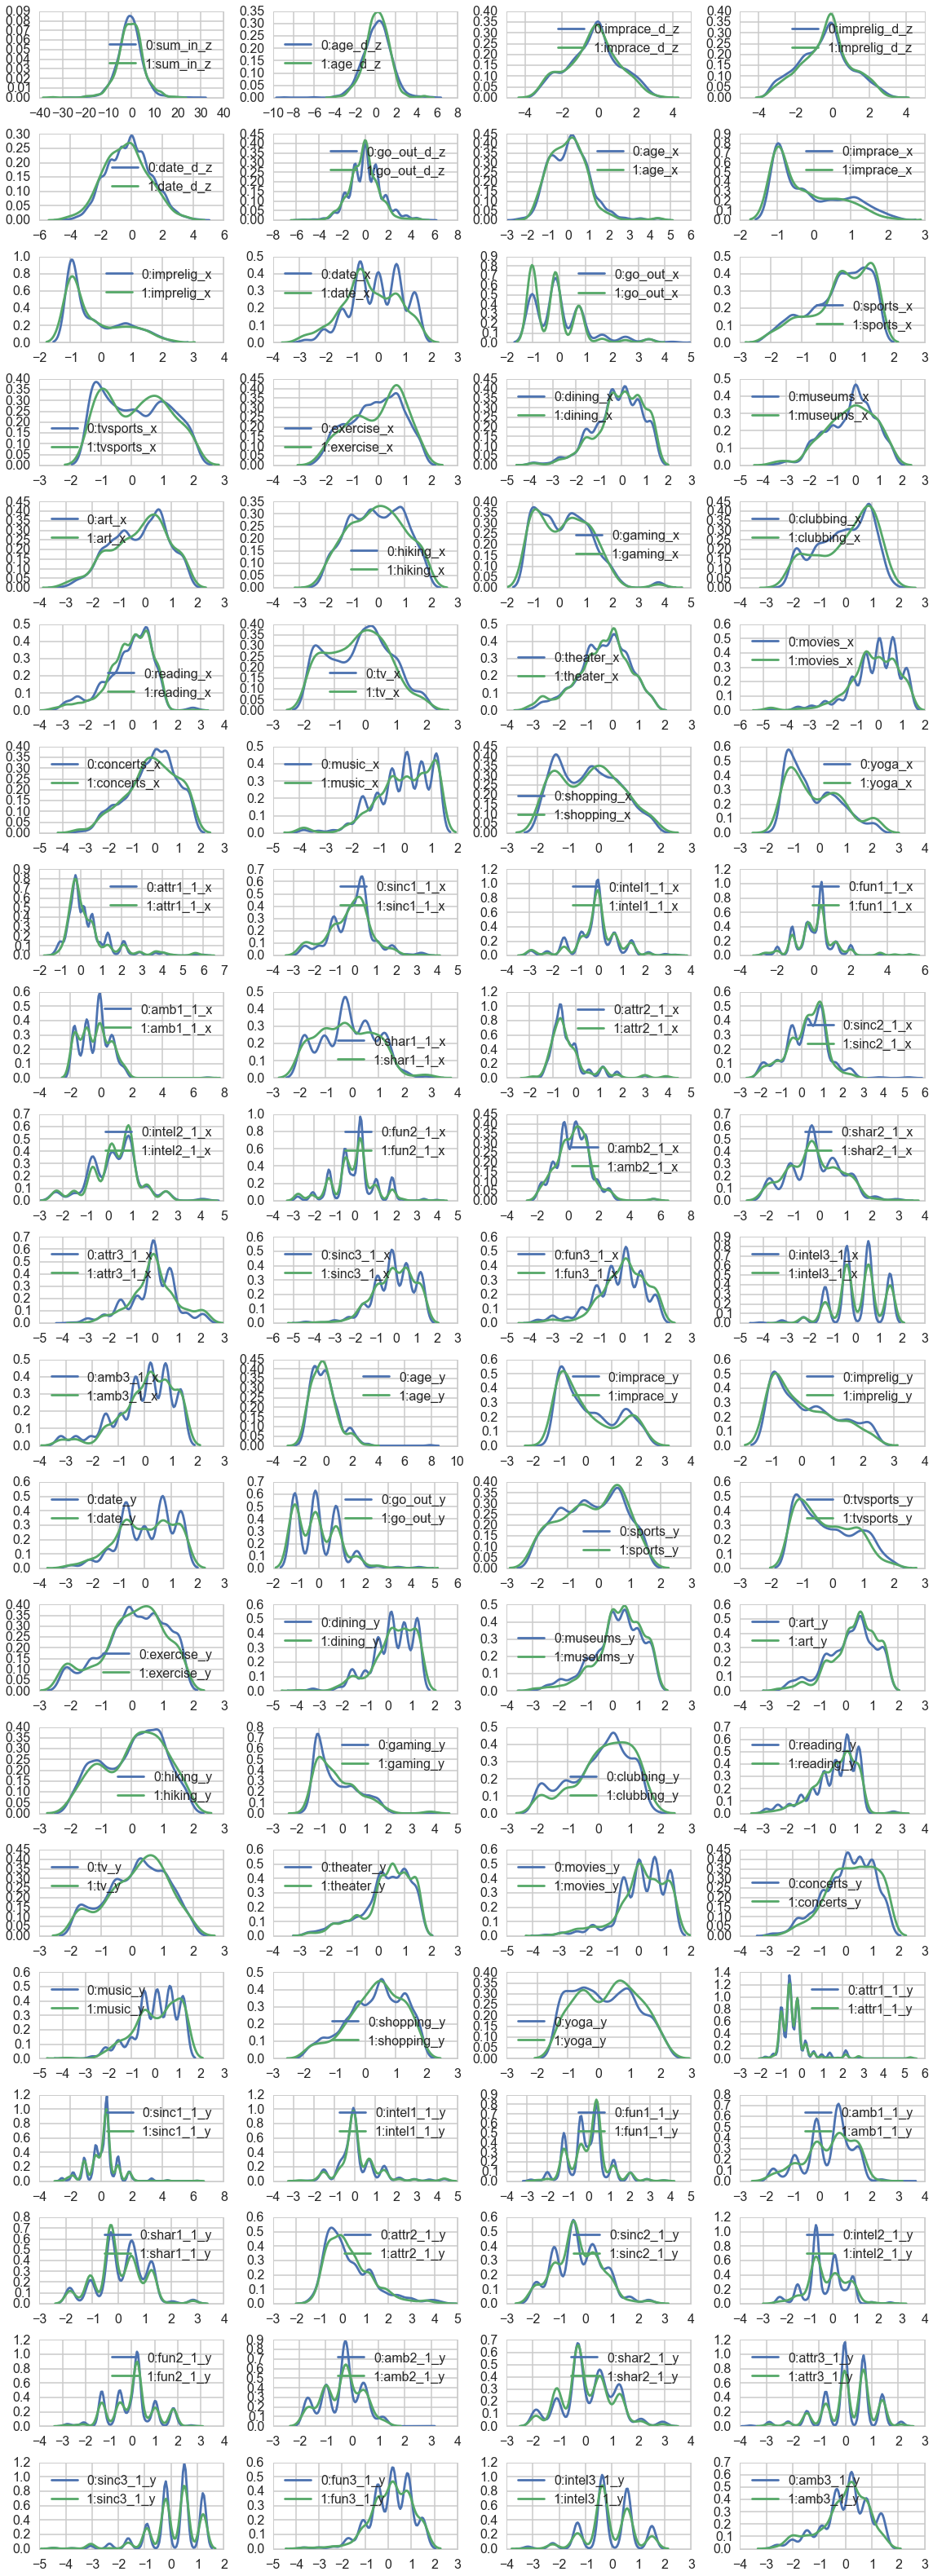

In [20]:
dfgb=dftouse.groupby('match_x')
fig, axes = plt.subplots(nrows=21, ncols=4, figsize=(16, 44), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), ccols):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name)

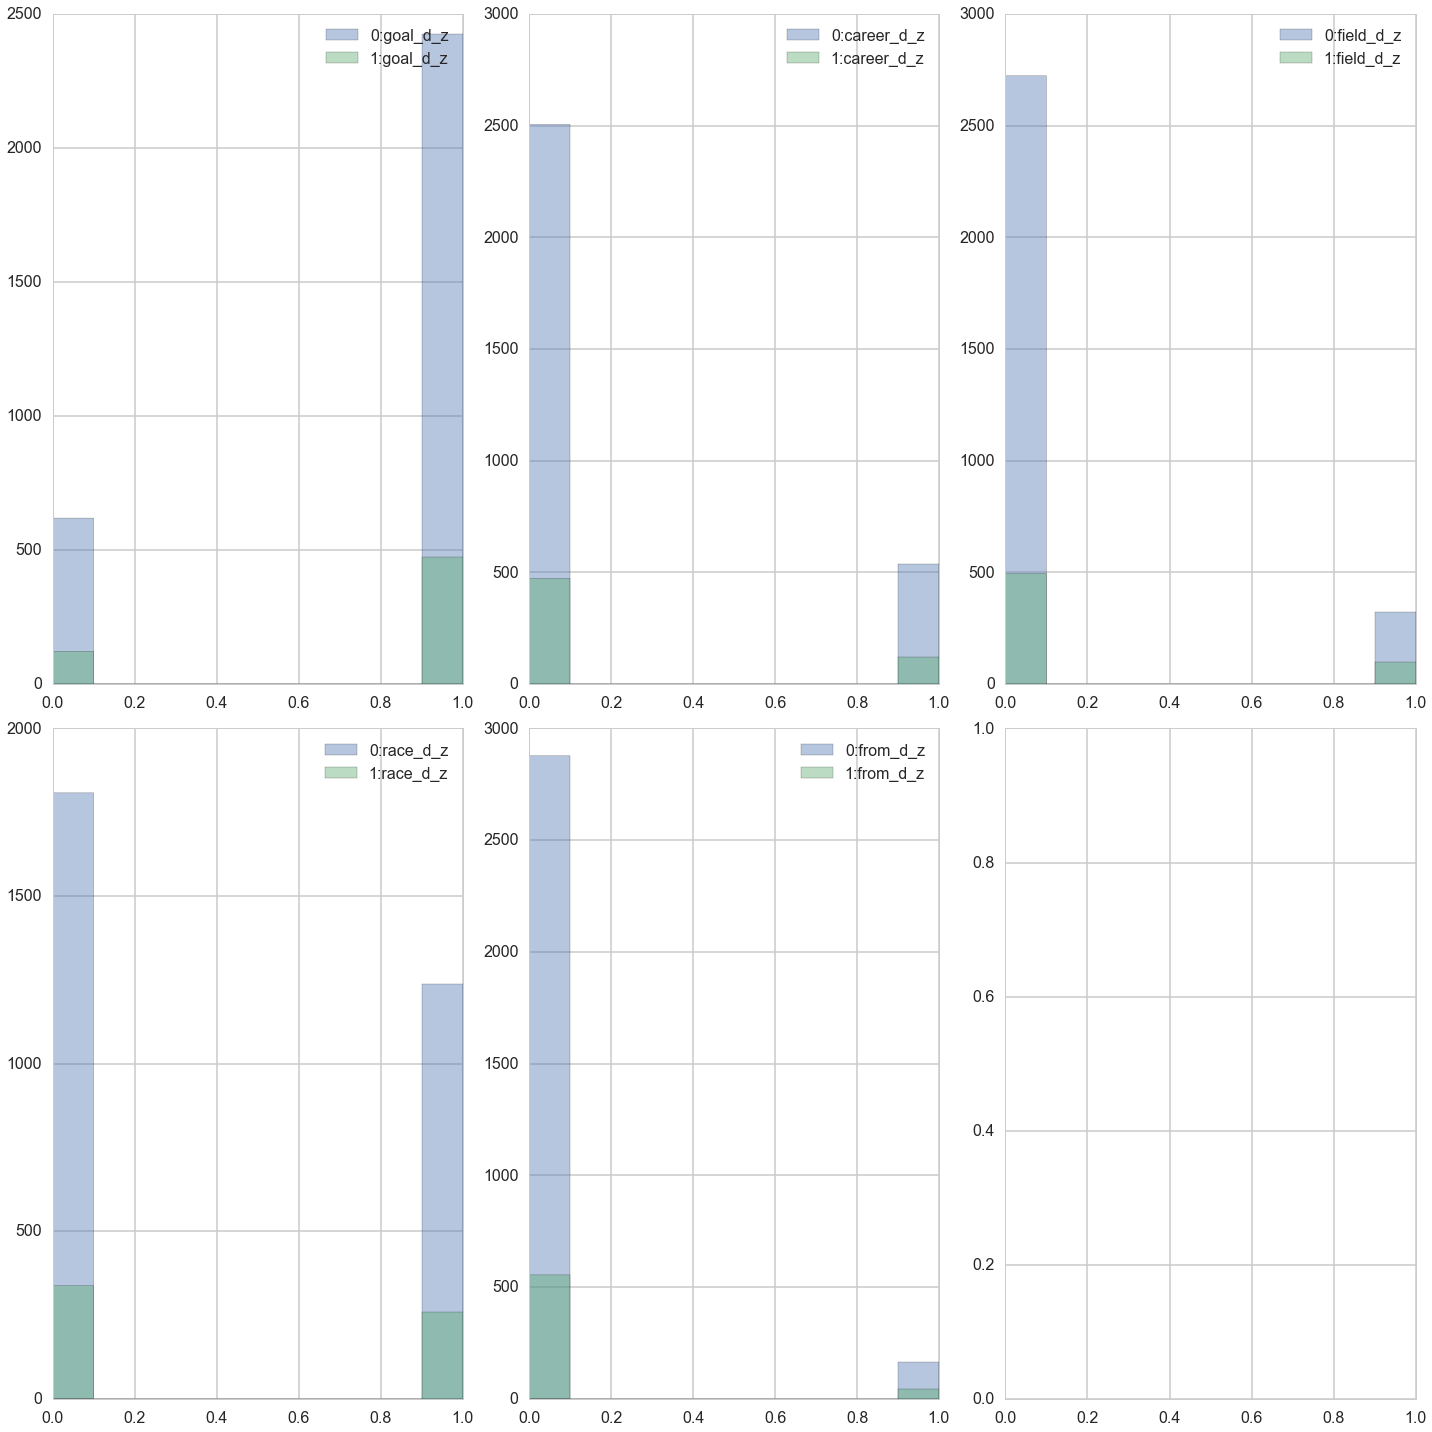

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), INDICATORS_d):
    for k, v in dfgb[p]:
        v.hist(ax=ax, alpha=0.4, label=str(k)+":"+v.name)
        ax.legend()

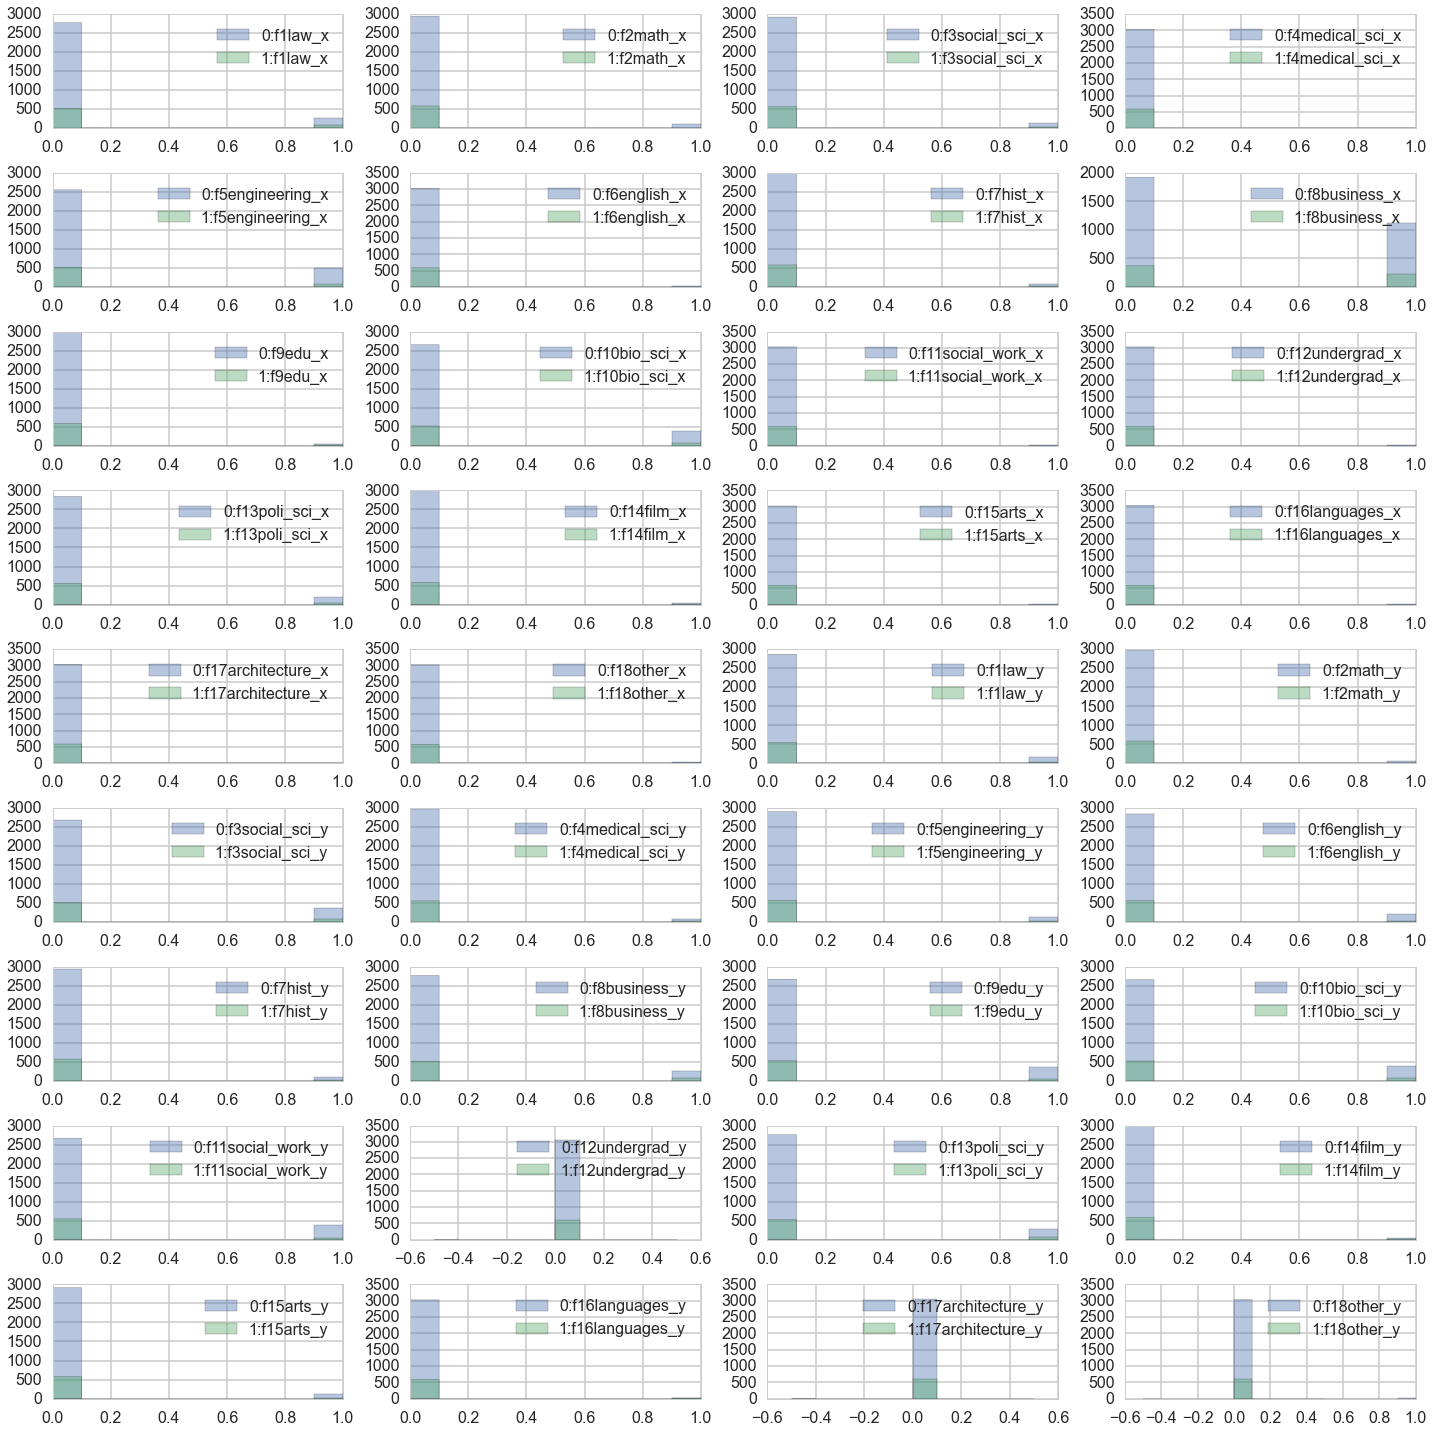

In [22]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 20), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), INDICATORS_f):
    for k, v in dfgb[p]:
        v.hist(ax=ax, alpha=0.4, label=str(k)+":"+v.name)
        ax.legend()

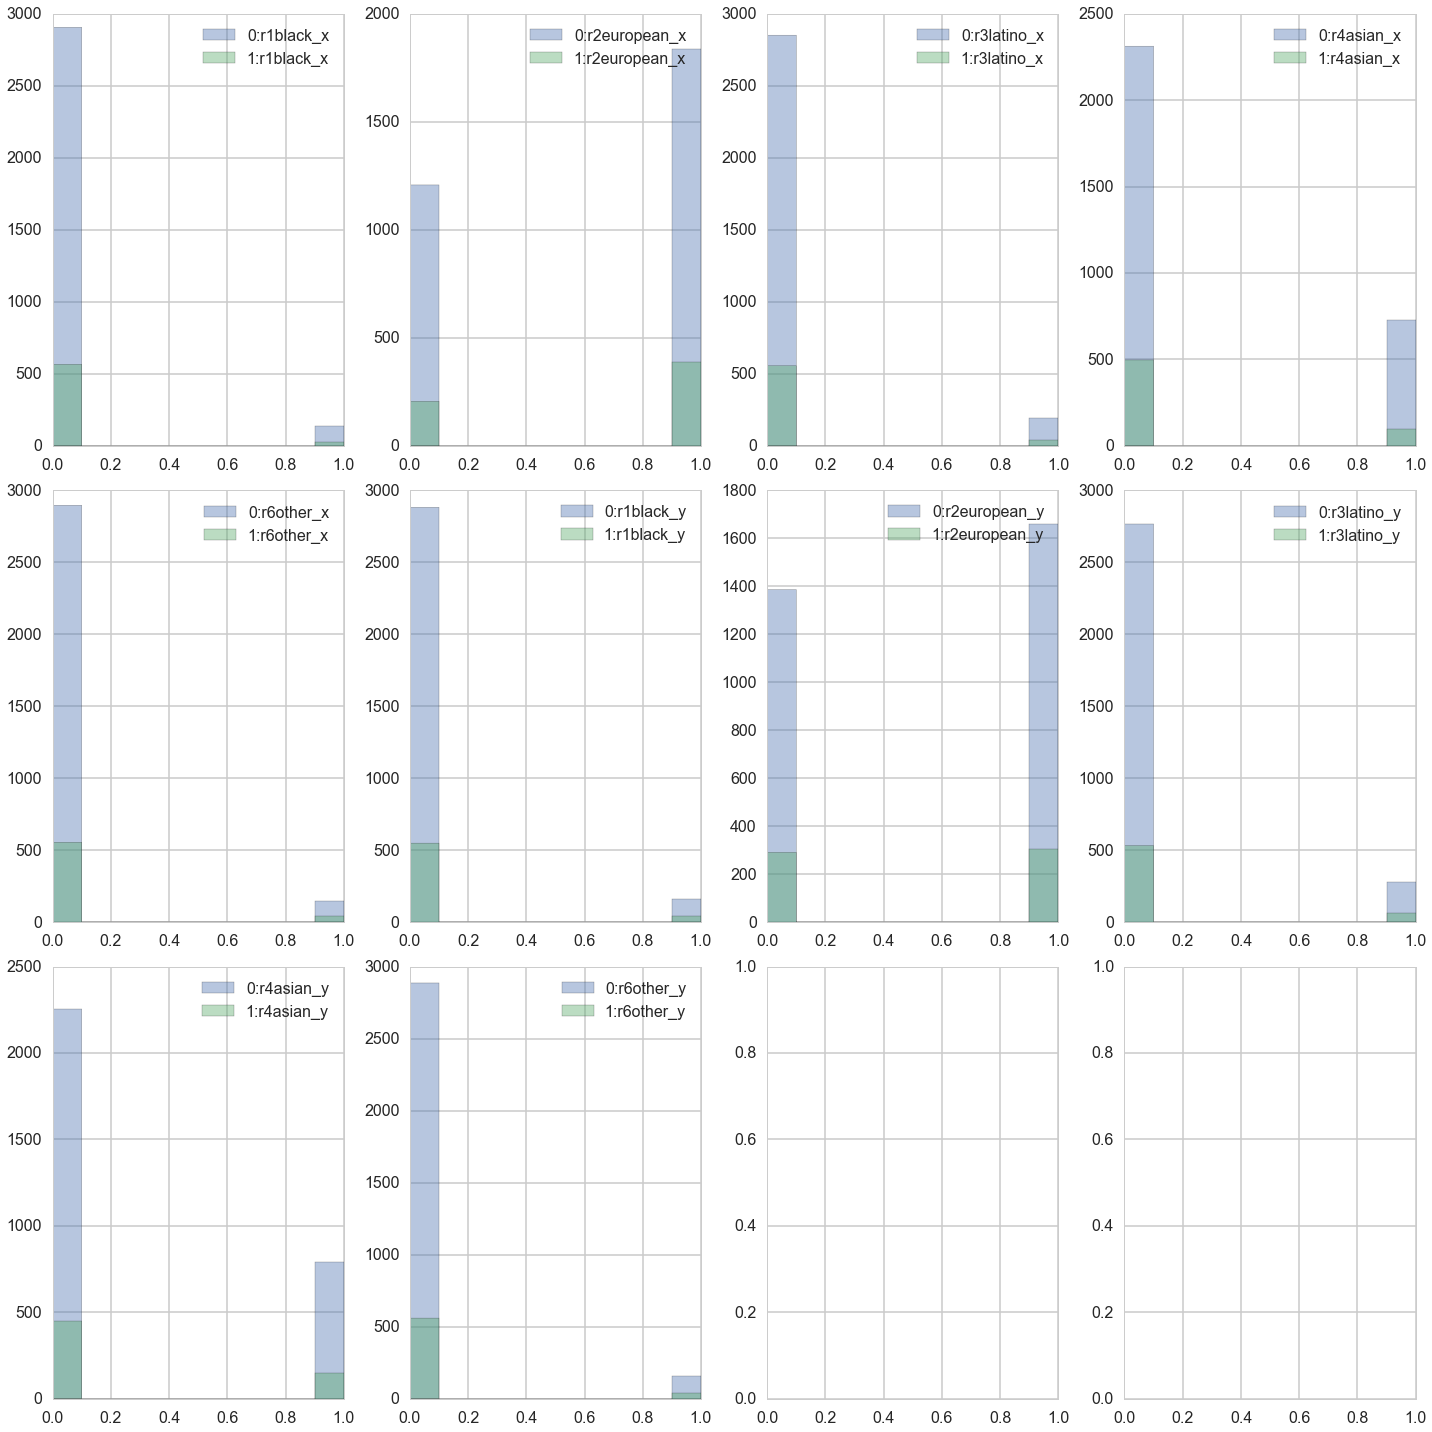

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), INDICATORS_r):
    for k, v in dfgb[p]:
        v.hist(ax=ax, alpha=0.4, label=str(k)+":"+v.name)
        ax.legend()

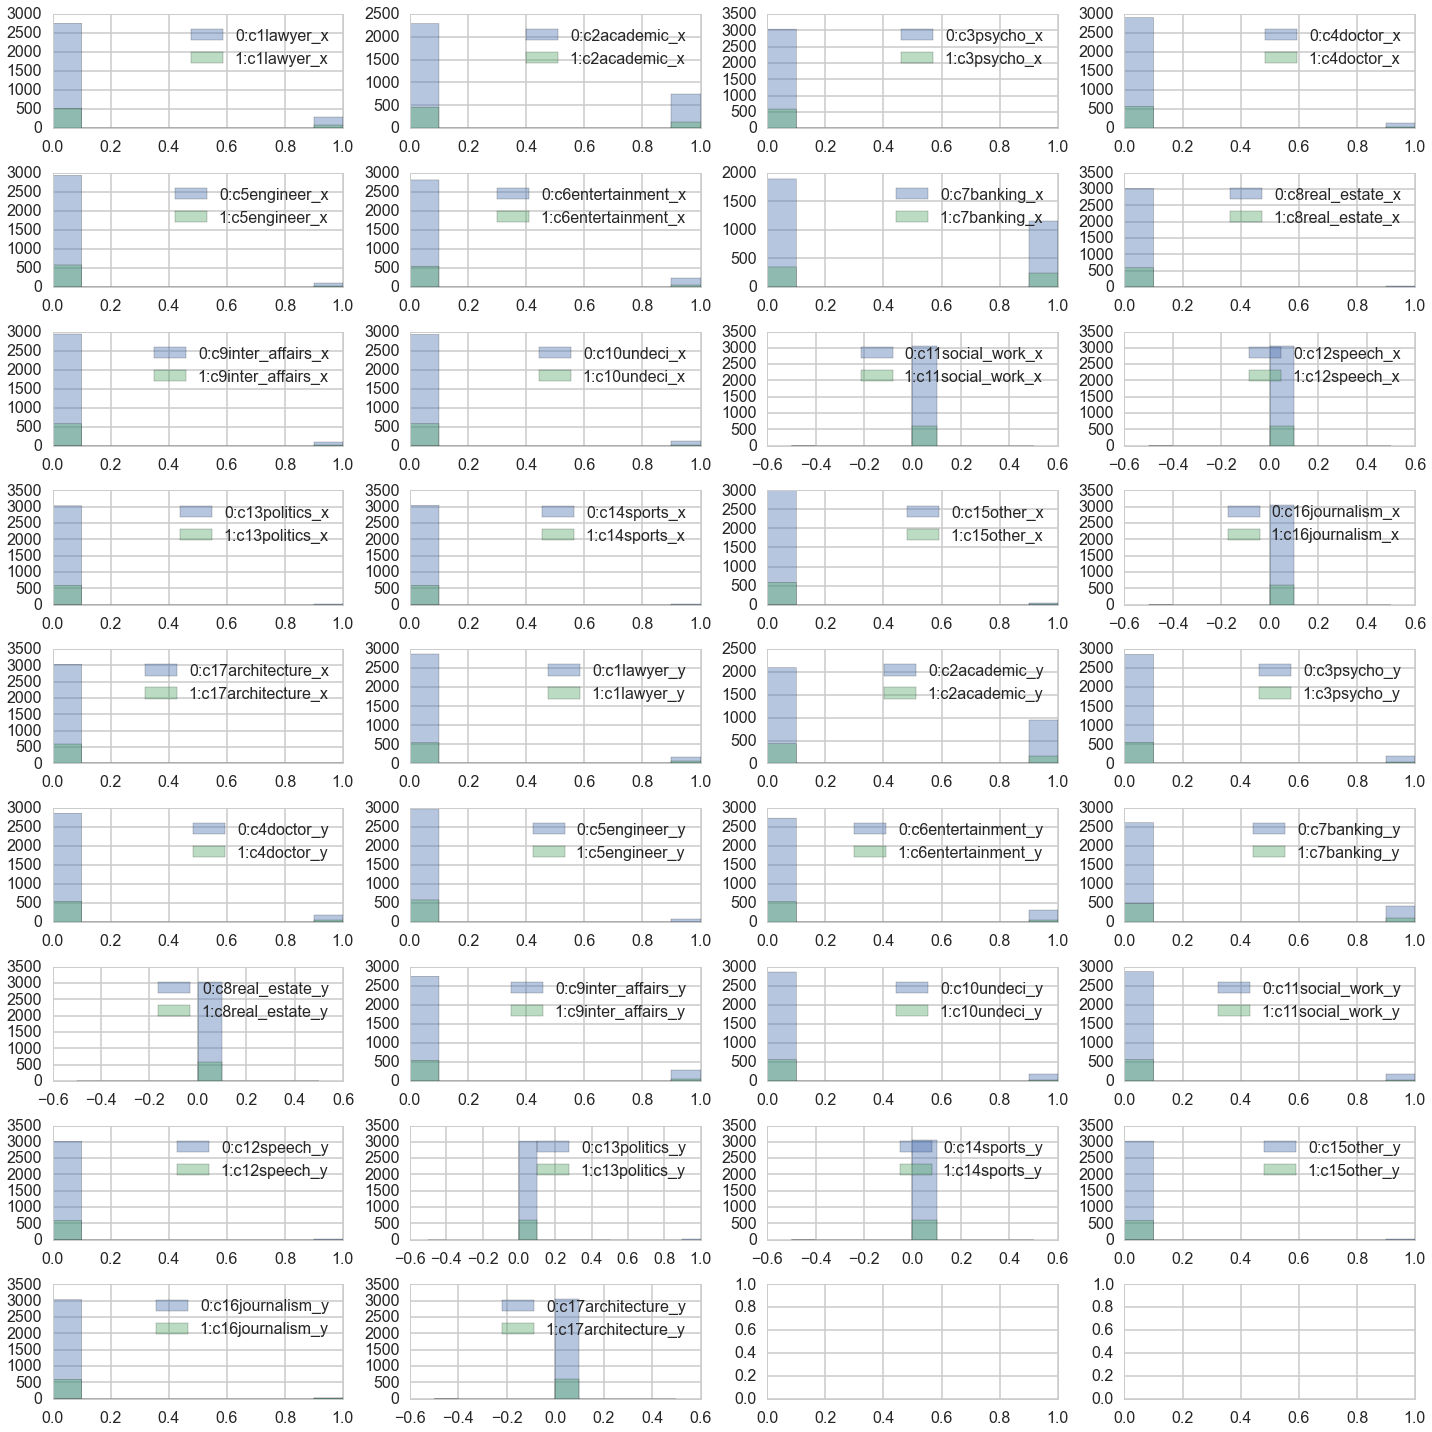

In [24]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 20), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), INDICATORS_c):
    for k, v in dfgb[p]:
        v.hist(ax=ax, alpha=0.4, label=str(k)+":"+v.name)
        ax.legend()

From KDE plot above, there might be no feature could significantly separate the positive and negative results. As for the histograms, for example, field_d_z looks quite promising. 

###Do Classifier

Let's write some functions for future use. Note that the confusion matrix function has all the observed data as rows and predicted data as columns. Thus position [0,0] is True Negative, [1,0] is False Negative, [0,1] is False Positive and [1,1] is True Positive. 

In [41]:
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [42]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
#     print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print "confusion matrix for training set:"
    print confusion_matrix(ytrain, clf.predict(Xtrain))
#     print "confusion matrix for test set:"
#     print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [43]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

In [44]:
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals   

In [45]:
def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

####Logistic regression with Lasso based feature selection
we run logistic regression with L1 regularization which could automatically does feature selection. The regularization hyperparameter C range in powers of 10 from 0.001 to 100. 

In [46]:
clflog,_,_,_,_  = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, dftouse, lcols, 'match_x', 1, reuse_split=reuse_split)

using reuse split
BEST {'C': 0.001} 0.832744405183 [mean: 0.83274, std: 0.00052, params: {'C': 0.001}, mean: 0.83274, std: 0.00052, params: {'C': 0.01}, mean: 0.83117, std: 0.00367, params: {'C': 0.1}, mean: 0.81076, std: 0.01341, params: {'C': 1}, mean: 0.77660, std: 0.03275, params: {'C': 10}, mean: 0.77267, std: 0.03567, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.83
confusion matrix for training set:
[[2121    0]
 [ 426    0]]
########################################################


In [47]:
lasso_importances=nonzero_lasso(clflog)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(20)

,abscoef,coef
feature,,


We find the accuracy on training set is 83%, but Logistic regression with Lasso selects nothing for us. In addition, we note false positive and true positive in confusion matrix are both zero. Indeed, we implemented a classifier on a very asymmetric training set which means the classifier predicts **EVERY** speed dating pair unmatched with an accuracy rate of 83-85%. Therefore, we'll use all following classifiers on balanced training set.  

####Logistic regression with Lasso on balanced training set. 

Let's retry Lasso on the balanced training set. 

In [48]:
clflog_b,_,_,_,_  = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, dftouse, lcols, 'match_x', 1, reuse_split=reuse_split_b)

using reuse split
BEST {'C': 1} 0.598591549296 [mean: 0.50000, std: 0.00000, params: {'C': 0.001}, mean: 0.50000, std: 0.00000, params: {'C': 0.01}, mean: 0.56925, std: 0.03764, params: {'C': 0.1}, mean: 0.59859, std: 0.06167, params: {'C': 1}, mean: 0.58099, std: 0.05272, params: {'C': 10}, mean: 0.58685, std: 0.04938, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.75
confusion matrix for training set:
[[323 103]
 [112 314]]
########################################################


Let's find non-zero coefficients in Lasso. 

In [49]:
lasso_importances_b=nonzero_lasso(clflog_b)
lasso_importances_b.set_index("feature", inplace=True)
lasso_importances_b.head(20)

,abscoef,coef
feature,,
f4medical_sci_y,1.398886,1.398886
f2math_y,1.105268,-1.105268
f3social_sci_x,1.090258,1.090258
f5engineering_y,0.893540,-0.893540
f2math_x,0.786746,-0.786746
c15other_y,0.680181,-0.680181
field_d_z,0.664466,0.664466
f11social_work_y,0.639728,-0.639728
art_y,0.614824,0.614824


This time, we found the confusion matrix and non zero coefficients make more sense. 
#### LinearSVC
Let's try another classifier using LinearSVC and passing the standard SVM hinge loss.  

In [50]:
clfsvm_b,_, _, _, _ = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, 'match_x',1, reuse_split=reuse_split_b)

using reuse split
BEST {'C': 0.1} 0.616197183099 [mean: 0.56690, std: 0.05148, params: {'C': 0.001}, mean: 0.59038, std: 0.05927, params: {'C': 0.01}, mean: 0.61620, std: 0.05618, params: {'C': 0.1}, mean: 0.61033, std: 0.05356, params: {'C': 1.0}, mean: 0.60563, std: 0.05200, params: {'C': 10.0}, mean: 0.55282, std: 0.03951, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.76
confusion matrix for training set:
[[324 102]
 [105 321]]
########################################################


Note the accuracy on training is slightly better than Lasso. 
#### LinearSVC with feature selected
Let's also try feature importance in Linear SVM. Here, we use Pearson correlation coefficient between each of features and the label to get a notion of which features are important in the classification process. The reason is there might be strong correlations between features and a large number of features can lead to overfitting. 

In [51]:
correlations=[]
for col in lcols:
    r=pearsonr(dftrbtouse[col], dftrbtouse['match_x'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

,abscorr,corr
feature,,
fun3_1_x,0.178742,0.178742
go_out_x,0.148824,-0.148824
clubbing_y,0.138501,0.138501
imprace_x,0.136871,-0.136871
date_x,0.129407,-0.129407
fun1_1_y,0.124794,0.124794
sinc1_1_x,0.121439,-0.121439
f4medical_sci_y,0.112593,0.112593
r4asian_x,0.109260,-0.109260


There is some overlap between the features selected with LASSO and the highest correlations but the orders don’t necessarily line up. For example, field difference between dating pair.  

We do correlation-with-response based feature selection for LinearSVM model and use the SelectKBest meta estimator to select the 25 most correlated/anti-correlated features.

In [52]:
selectorlinearsvm = SelectKBest(k=25, score_func=pearson_scorer)
pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])
pipelinearsvm_b, _,_,_,_  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, 'match_x',1, reuse_split=reuse_split_b)

using reuse split
BEST {'svm__C': 10.0} 0.566901408451 [mean: 0.54225, std: 0.05497, params: {'svm__C': 1e-05}, mean: 0.54812, std: 0.05254, params: {'svm__C': 0.001}, mean: 0.55869, std: 0.05056, params: {'svm__C': 0.01}, mean: 0.55164, std: 0.04571, params: {'svm__C': 0.1}, mean: 0.56221, std: 0.05174, params: {'svm__C': 1.0}, mean: 0.56690, std: 0.05324, params: {'svm__C': 10.0}, mean: 0.53873, std: 0.04800, params: {'svm__C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.69
confusion matrix for training set:
[[289 137]
 [131 295]]
########################################################


Access features used by pipelined classifier. 

In [53]:
np.array(lcols)[pipelinearsvm_b.get_params()['select'].get_support()]

array(['field_d_z', 'imprace_x', 'date_x', 'go_out_x', 'dining_x',
       'clubbing_x', 'music_x', 'yoga_x', 'sinc1_1_x', 'fun3_1_x',
       'amb3_1_x', 'f3social_sci_x', 'f9edu_x', 'r4asian_x', 'c3psycho_x',
       'art_y', 'gaming_y', 'clubbing_y', 'concerts_y', 'fun1_1_y',
       'amb3_1_y', 'f2math_y', 'f4medical_sci_y', 'f11social_work_y',
       'c15other_y'], 
      dtype='|S17')

####ROC Curve

ROC curves are a set of classifiers, each point corresponding to a different threshold. To make a ROC curve you plot the True Positive Rate against the False Positive Rate. 

They are useful because they calculate one classifier per threshold and show you where you are in TPR/FPR space without making any assumptions about which threshold is appropriate. In the plot, a curve with a greater AUC (area under curve), or further away from the line of randomness, will give us a rough idea of what might be a better classifier.

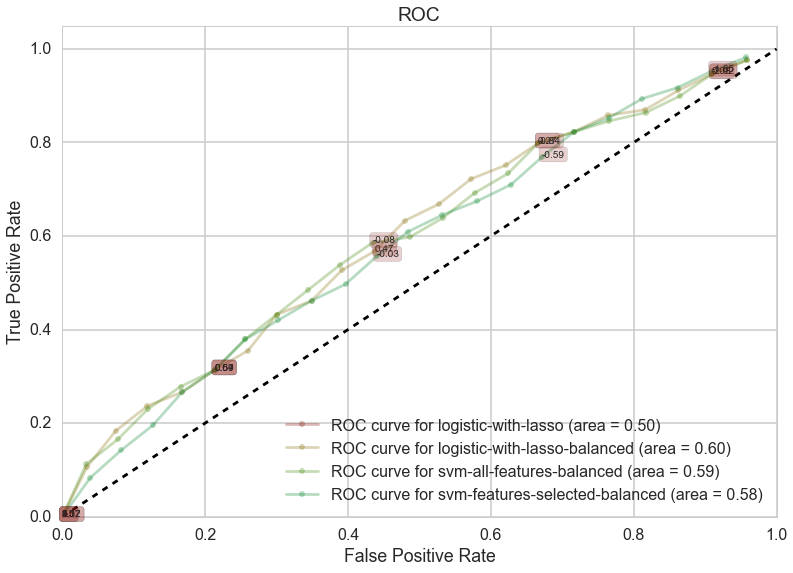

In [54]:
with sns.hls_palette(8, l=.3, s=.8):
    ax = make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=250, proba=True,  skip=50)
    make_roc("logistic-with-lasso-balanced",clflog_b, ytest, Xtest, ax, labe=250, proba=True,  skip=50);
    make_roc("svm-all-features-balanced",clfsvm_b, ytest, Xtest, ax, labe=250, proba=False, skip=50);
    make_roc("svm-features-selected-balanced",pipelinearsvm_b, ytest, Xtest, ax, labe=250, proba=False, skip=50);

From the plot above, we find Lasso, LinearSVM, and LinearSVM with feature selected on the balanced training set have the similar AUC. But Lasso did a slightly better job which means it could be a good candidate for classification. 

####Random Forest

Let's also try Random Forest with which we'll be optimizing number of trees in the forest. This method is very similar to the bootstrap aggregation method. However, as the name suggests some extra randomness is injected into the building of the trees. It turns out that the trees that are build from the random subsample of your data are quite similar, so the solution is quite simple.

In [55]:
clfForest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 15)}
clfForest1, _, _, _, _ = do_classify(clfForest, parameters, dftouse, lcols, 'match_x', 1, reuse_split=reuse_split_b, score_func='f1')

using reuse split
BEST {'n_estimators': 11} 0.493736185399 [mean: 0.44205, std: 0.07790, params: {'n_estimators': 1}, mean: 0.34009, std: 0.04581, params: {'n_estimators': 2}, mean: 0.45603, std: 0.08030, params: {'n_estimators': 3}, mean: 0.37557, std: 0.06755, params: {'n_estimators': 4}, mean: 0.47414, std: 0.04787, params: {'n_estimators': 5}, mean: 0.37075, std: 0.10443, params: {'n_estimators': 6}, mean: 0.48099, std: 0.03771, params: {'n_estimators': 7}, mean: 0.41170, std: 0.08480, params: {'n_estimators': 8}, mean: 0.47692, std: 0.03474, params: {'n_estimators': 9}, mean: 0.44539, std: 0.03467, params: {'n_estimators': 10}, mean: 0.49374, std: 0.04447, params: {'n_estimators': 11}, mean: 0.41173, std: 0.08620, params: {'n_estimators': 12}, mean: 0.49244, std: 0.04996, params: {'n_estimators': 13}, mean: 0.38910, std: 0.10548, params: {'n_estimators': 14}]
############# based on standard predict ################
Accuracy on training data: 0.99
confusion matrix for training set:

Note the accuracy on the training set is very high which might result from overfitting. Get a measure of how important a variable is from a random forest, it's essentially a measure of how well each particular variable is able to predict well when it is selected. 

In [56]:
importance_list_Forest = clfForest1.feature_importances_
print len(importance_list_Forest[importance_list_Forest>0])

139


Show the first 30 features with the highest importance

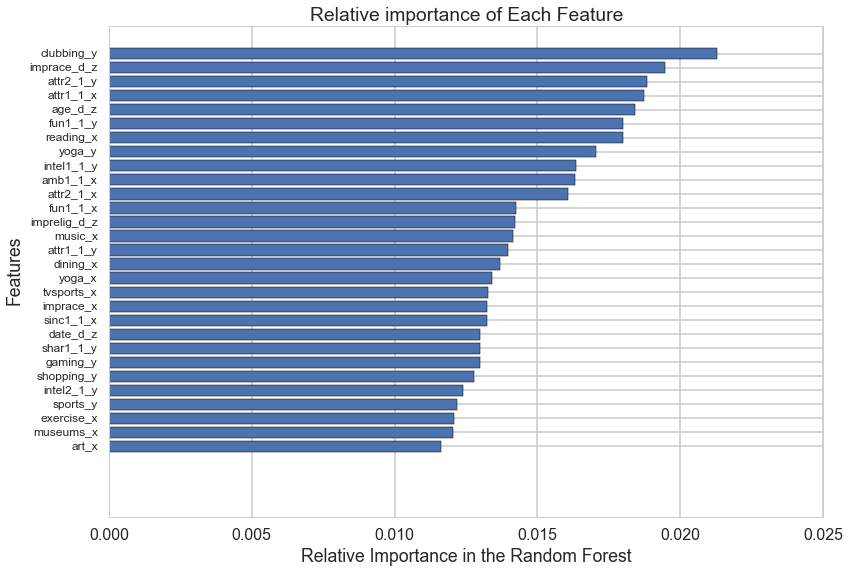

In [57]:
name_list = lcols
importance_list, name_list = zip(*sorted(zip(importance_list_Forest, name_list)))
plt.barh(range(len(name_list[-30:-1])),importance_list[-30:-1],align='center')
plt.yticks(range(len(name_list[-30:-1])),name_list[-30:-1], fontsize=12)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

###Conclusion

From all the analysis above, it is essential to train on a balanced set. In addition, a good accuracy on train data and a relatively low False Negatives make contribute to a better classifier. In order words, if there is less False Negatives, we have less possibility to predict an observed matched dating pair as unmatched. Therefore, **LinearSVC** with all features could be a better classifier. 

In [59]:
ytest_pred = clfsvm_b.predict(reuse_split['Xtest'])
ytest_actual = reuse_split['ytest']
print "Linear SVC with C=1 has test score: ", np.mean(ytest_pred==ytest_actual)
print "confusion matrix is: "
print confusion_matrix(ytest_actual, ytest_pred)

Linear SVC with C=1 has test score:  0.587912087912
confusion matrix is: 
[[550 373]
 [ 77  92]]


The **Linear SVC** with all features with parameter *C=1* gives train accuracy *0.76* and test accuracy *0.59*. The flase positive rate is 0.34 and the false negative rate is 0.07. We wanted the false negative to be low, which is consistent with this model, because we don't want people who can actually become pairs to be predicted as failure. 